### How are In-demand Skills Trending for the top 3 popular Data Roles?
#### Methodology
1. Aggregate skills count monthly.
2. Calculate the likelihood of skills trend based on percentage of total jobs
3. plot the monthly skills trend figure.


In [2]:
# Importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns
from adjustText import adjust_text

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Hide error message
from IPython.display import display
display()

# Cleaning the Data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # converting to the right time value
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills) # converting job_skills to a list

In [3]:
df_UK = df[(df['job_country'] == 'United Kingdom') & (df['job_title_short'] ==  'Data Analyst')].copy()

In [4]:
df_UK['job_posted_month_no'] = df_UK['job_posted_date'].dt.month

In [5]:
df_UK_explode= df_UK.explode('job_skills')

In [6]:
df_UK_pivot = df_UK_explode.pivot_table(index= 'job_posted_month_no', columns= 'job_skills', aggfunc= 'size', fill_value= 0)
df_UK_pivot.loc['Total'] = df_UK_pivot.sum()
df_UK_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,...,vmware,vue,vue.js,watson,windows,wire,word,workfront,wsl,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4,2,31,0,0,0,1,0,0,1,...,1,1,0,0,14,0,68,0,1,2
2,0,0,13,0,0,0,0,0,3,0,...,7,0,0,0,10,0,55,1,0,1
3,2,0,12,0,0,0,0,0,0,0,...,1,0,0,0,4,0,41,0,0,1
4,1,0,13,0,0,0,0,0,1,1,...,2,0,1,0,8,0,27,0,0,0
5,3,4,13,0,0,0,0,0,1,1,...,0,0,0,0,0,0,28,0,0,1
6,3,0,3,0,0,0,0,0,1,1,...,0,1,2,0,1,0,38,0,0,0
7,8,0,9,0,1,0,0,0,1,0,...,3,0,2,0,4,0,49,0,0,0
8,4,0,1,0,0,0,1,0,0,0,...,3,0,0,0,6,3,28,0,0,2
9,3,0,19,0,2,2,6,0,0,0,...,4,0,0,1,8,0,53,0,0,2


In [7]:
df_UK_pivot = df_UK_pivot[df_UK_pivot.loc['Total'].sort_values(ascending=False).index]
df_UK_pivot = df_UK_pivot.drop('Total')

In [8]:
df_UK_pivot

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,selenium,flutter,fortran,redis,golang,ionic,kotlin,laravel,node,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,607,581,371,266,204,141,126,73,54,78,...,0,1,0,0,0,0,0,0,1,0
2,450,479,287,179,171,91,92,65,46,45,...,0,0,0,0,0,0,0,0,0,0
3,301,299,174,120,117,67,52,38,42,43,...,0,0,0,0,0,0,0,0,0,0
4,230,227,160,90,75,47,38,32,27,39,...,0,0,0,1,0,1,0,0,0,0
5,258,249,161,96,76,53,40,36,29,27,...,0,0,0,0,0,0,0,0,0,0
6,282,297,181,118,95,52,36,36,37,34,...,0,0,0,0,0,0,0,0,0,0
7,398,394,297,202,106,97,78,111,45,84,...,0,0,0,0,0,0,0,0,0,0
8,260,262,171,109,84,51,36,42,39,28,...,0,0,1,0,0,0,0,0,0,0
9,498,451,318,255,206,144,82,70,61,48,...,0,0,0,0,0,0,1,1,0,0


### from count to percentage...

In [9]:
total_jobs = df_UK.groupby('job_posted_month_no').size()
total_jobs

job_posted_month_no
1     1467
2     1051
3      712
4      561
5      614
6      736
7      892
8      610
9     1112
10    1175
11     840
12     712
dtype: int64

In [10]:
DA_percent = df_UK_pivot.div(total_jobs, axis= 0)*100
DA_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,selenium,flutter,fortran,redis,golang,ionic,kotlin,laravel,node,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,41.376960,39.604635,25.289707,18.132243,13.905930,9.611452,8.588957,4.976142,3.680982,5.316973,...,0.000000,0.068166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068166,0.000000
2,42.816365,45.575642,27.307326,17.031399,16.270219,8.658421,8.753568,6.184586,4.376784,4.281637,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,42.275281,41.994382,24.438202,16.853933,16.432584,9.410112,7.303371,5.337079,5.898876,6.039326,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,40.998217,40.463458,28.520499,16.042781,13.368984,8.377897,6.773619,5.704100,4.812834,6.951872,...,0.000000,0.000000,0.000000,0.178253,0.000000,0.178253,0.000000,0.000000,0.000000,0.000000
5,42.019544,40.553746,26.221498,15.635179,12.377850,8.631922,6.514658,5.863192,4.723127,4.397394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,38.315217,40.353261,24.592391,16.032609,12.907609,7.065217,4.891304,4.891304,5.027174,4.619565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,44.618834,44.170404,33.295964,22.645740,11.883408,10.874439,8.744395,12.443946,5.044843,9.417040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,42.622951,42.950820,28.032787,17.868852,13.770492,8.360656,5.901639,6.885246,6.393443,4.590164,...,0.000000,0.000000,0.163934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,44.784173,40.557554,28.597122,22.931655,18.525180,12.949640,7.374101,6.294964,5.485612,4.316547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089928,0.089928,0.000000,0.000000


In [11]:
# changing month number to month name...
DA_percent= DA_percent.reset_index()
DA_percent['job_posted_month'] = DA_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format ='%m').strftime('%b'))
DA_percent = DA_percent.set_index('job_posted_month')
DA_percent = DA_percent.drop(columns= 'job_posted_month_no')
DA_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,selenium,flutter,fortran,redis,golang,ionic,kotlin,laravel,node,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,41.376960,39.604635,25.289707,18.132243,13.905930,9.611452,8.588957,4.976142,3.680982,5.316973,...,0.000000,0.068166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068166,0.000000
Feb,42.816365,45.575642,27.307326,17.031399,16.270219,8.658421,8.753568,6.184586,4.376784,4.281637,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,42.275281,41.994382,24.438202,16.853933,16.432584,9.410112,7.303371,5.337079,5.898876,6.039326,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,40.998217,40.463458,28.520499,16.042781,13.368984,8.377897,6.773619,5.704100,4.812834,6.951872,...,0.000000,0.000000,0.000000,0.178253,0.000000,0.178253,0.000000,0.000000,0.000000,0.000000
May,42.019544,40.553746,26.221498,15.635179,12.377850,8.631922,6.514658,5.863192,4.723127,4.397394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,38.315217,40.353261,24.592391,16.032609,12.907609,7.065217,4.891304,4.891304,5.027174,4.619565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,44.618834,44.170404,33.295964,22.645740,11.883408,10.874439,8.744395,12.443946,5.044843,9.417040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,42.622951,42.950820,28.032787,17.868852,13.770492,8.360656,5.901639,6.885246,6.393443,4.590164,...,0.000000,0.000000,0.163934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,44.784173,40.557554,28.597122,22.931655,18.525180,12.949640,7.374101,6.294964,5.485612,4.316547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089928,0.089928,0.000000,0.000000


C:\Users\ekene\AppData\Local\Temp\ipykernel_12648\3838311762.py:5: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(df_plot, palette= 'tab10', dashes= False, markers= 'o')


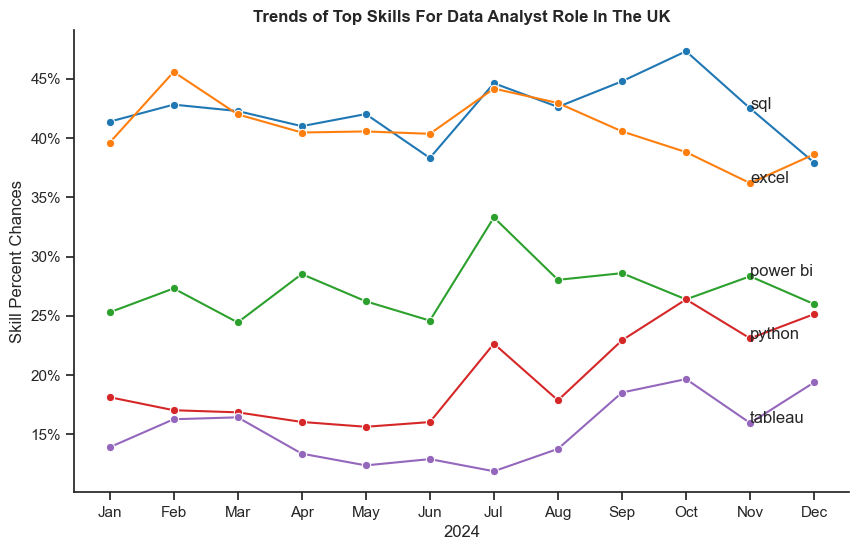

In [19]:
# plotting only the first five columns
plt.figure(figsize= (10,6))
sns.set_theme(style= 'ticks')
df_plot= DA_percent.iloc[:, :5]
sns.lineplot(df_plot, palette= 'tab10', dashes= False, markers= 'o')
sns.despine()

plt.legend().remove()
plt.title('Trends of Top Skills For Data Analyst Role In The UK', fontsize= 12, weight= 'bold')
plt.xlabel('2024')
plt.ylabel('Skill Percent Chances')

#to label the yaxis as percentage
from matplotlib.ticker import PercentFormatter
ax= plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(xmax= 100, decimals=0))

# to add labels to each line
for i in range(5):
    plt.text(10, df_plot.iloc[10, i], DA_percent.columns[i])

plt.show()    